<a href="https://colab.research.google.com/github/Zeeshan2012/Yes_Bank_Stock_Price_Project/blob/main/Yes_Bank_Share_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in thenews because of the fraud case involving Rana Kapoor. Owing to this fact, it was interestingto see how that impacted the stock prices of the company and whether Time series modelsor any other predictive models can do justice to such situations. This dataset has monthlystock prices of the bank since its inception and includes closing, starting, highest, and loweststock prices of every month. The main objective is to predict the stock’s closing price of themonth.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Here in this project, our objective is, in order to predict the stock's closing price of the month there are few things that'll be required or you can say that (mandatory) to perform regression analysis or building a better model which can easily and accurately predict our desired output.

So, to build a well performing model, we have divided our task into several steps:

Feature Engineering: Introducing New Variables, Dummy Variables

Univariate Analysis: Distplot, Histogram, Barplot

Bivariate Analysis: Boxplot, Heatmap,

Introduced Models: Linear Regression, Lasso and Ridge

Our Data has following features (Column):

1. Open : Opening price of the stock of particular day
2. High : It's the highest price at which a stock traded during a period
3. Low : It's the lowest price at which stock traded during a period
4. Close : Closing price of a stock at the end of a Trading Day
5. Date : We will use it as a index

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/YES_Bank_Stock_Price_prediction/data_YesBank_StockPrices.csv') #reading the csv file

In [6]:
#copy the data to df
df = data.copy()

In [5]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [6]:
#get the number of rows and columns in the dataset 
df.shape

(185, 5)

In [7]:
#getting the info of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


There is no null value.
We need to correct date time in correct format


In [7]:
#check for duplicates
len(df[df.duplicated()])

0

In [8]:
#importing datetime
from datetime import datetime
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [9]:
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [9]:
#desccriptive statistic
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


There is a high variation in values of Open,High,Low and Close

check for distribution of our dataset

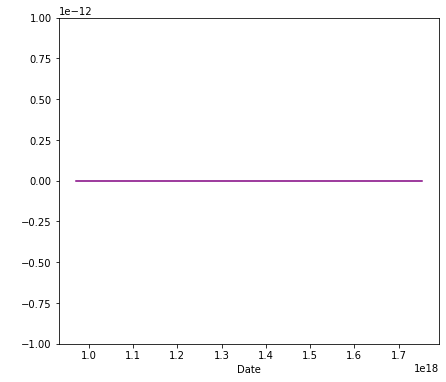

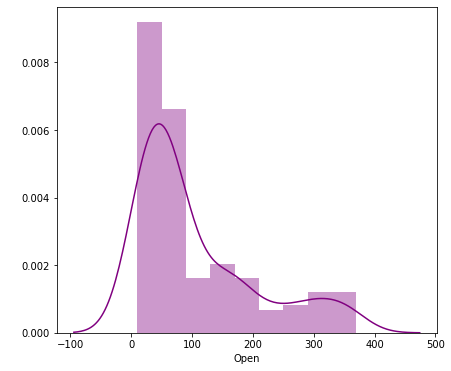

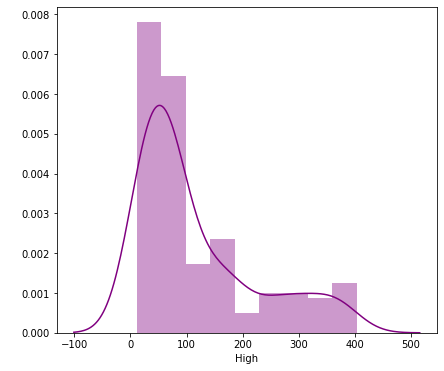

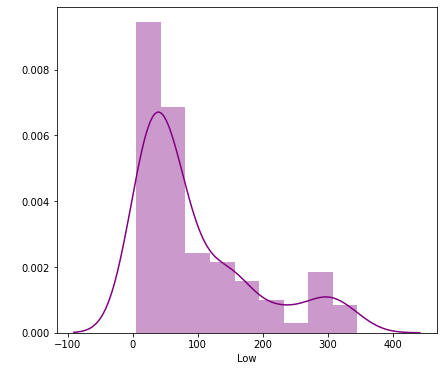

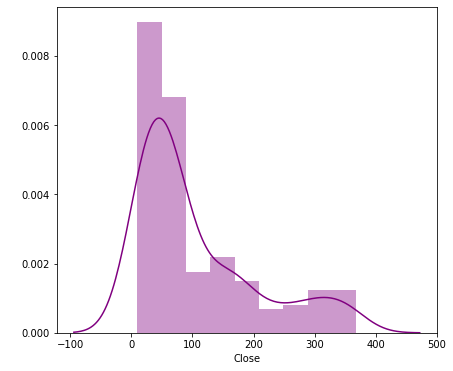

In [10]:
#plot the Distribution graph
#plot for independent variable
for var in df:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(df[var],color='purple')
    fig.set_ylabel(' ')
    fig.set_xlabel(var) 


Ignore the Date Graph and
we can see the data is positively screwed so we need to apply log transformation.


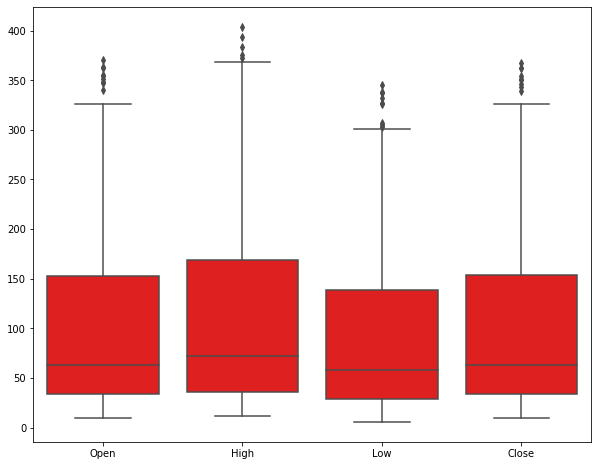

In [11]:
plt.figure(figsize=(10,8))
fig = sns.boxplot(data = df, color = 'red')


In [12]:
#we will store dependent and independent variable separetly
ind_var = df[['Open','High','Low']]
dep_var = df[['Close']]

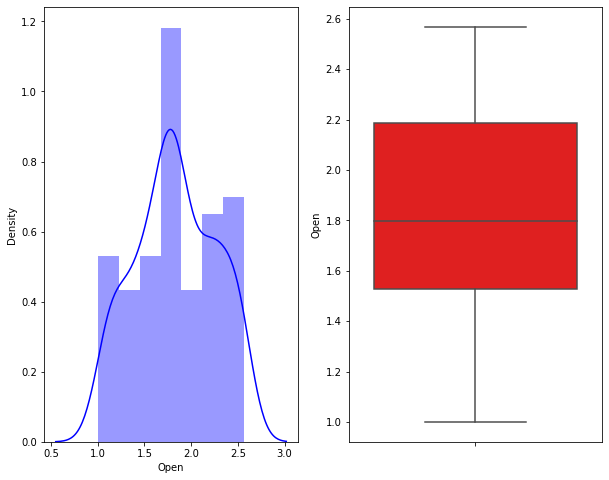

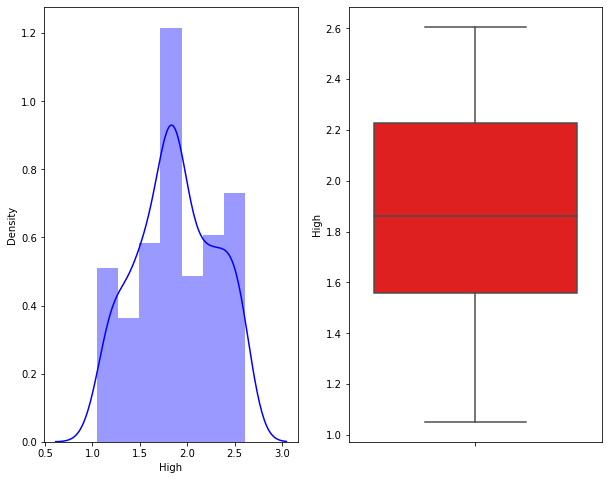

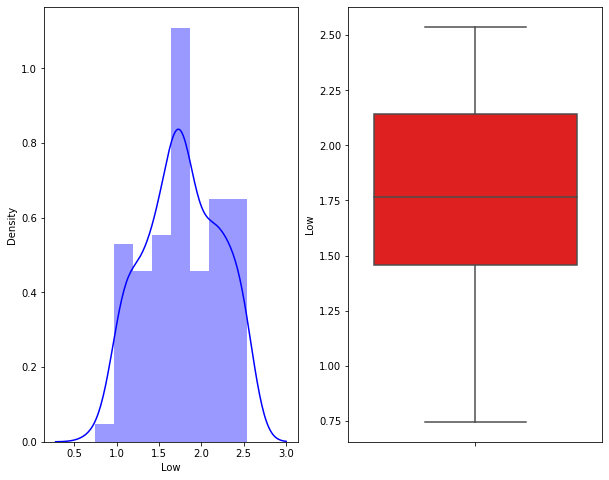

In [13]:
#plot the Graph with Log transformation
for var in ind_var:
  plt.figure(figsize = (10,8))
  plt.subplot(1,2,1)
  fig = sns.distplot(np.log10(ind_var[var]), color = 'blue')
  fig.set_xlabel(var)

  plt.subplot(1,2,2)
  fig = sns.boxplot(y = np.log10(ind_var[var]), color = 'red')

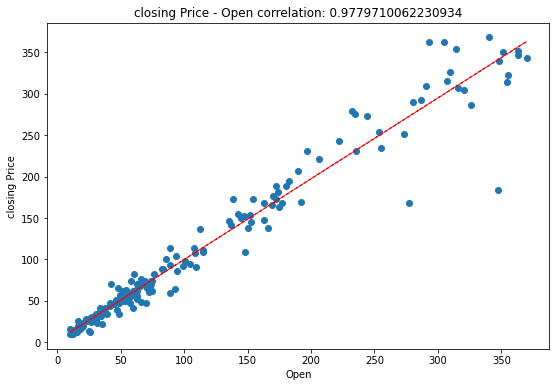

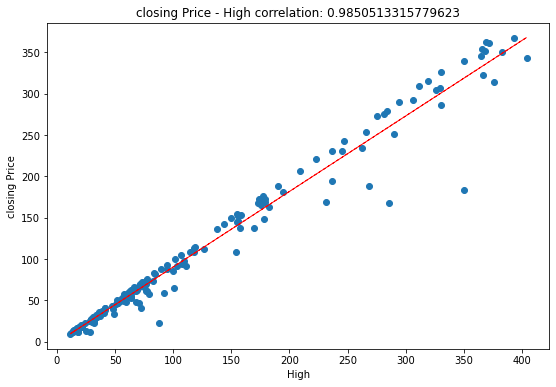

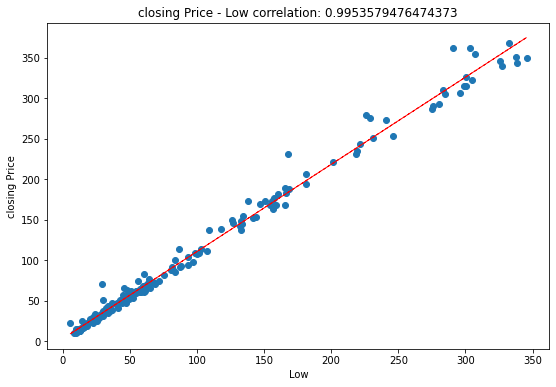

In [14]:
#now check for correlation between Dependent variable and HIGH,OPEN,CLOSE PRICE
for col in ind_var:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = df[col]
   label = df['Close']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('closing Price')
   ax.set_title('closing Price - ' + col + ' correlation: ' + str(correlation))
   z = np.polyfit(df[col], df['Close'], 1)
   y_hat = np.poly1d(z)(df[col])
 
   plt.plot(df[col], y_hat, "r--", lw=1)
 
plt.show()

We can see there is a high Correlation between Independent and Dependent Variables

now we will perform some feature engineering.

In [15]:
#adding Average , Month and Year Column in our dataset

df['Average'] = (df['Low'] + df['High'])/2
df['Month'] = df['Date'].apply(lambda y :y.strftime('%B'))
df['Year'] = df['Date'].apply(lambda y :y.strftime('%Y'))

In [16]:
df.drop('Date', axis = 1,inplace=True)

In [56]:
df.head()

,Open,High,Low,Close,Average,Month,Year
0,13.00,14.00,11.25,12.46,12.625,July,2005
1,12.58,14.88,12.55,13.42,13.715,August,2005
2,13.48,14.87,12.27,13.30,13.570,September,2005
3,13.20,14.47,12.40,12.99,13.435,October,2005
4,13.35,13.88,12.88,13.41,13.380,November,2005


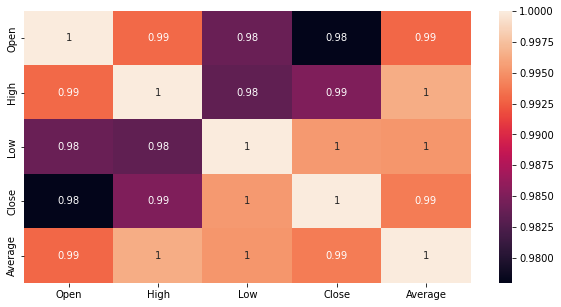

In [61]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot = True)
plt.show()

All the Corr values are 0.98,0.99 or 1 which leads to Multicollinearity So there will be a problem in Fitting model and prediction , means a slight change in the inpendent variable will lead to unpredictable result.

To check multicollinearity and how much it is in our dataset, we have to calculate VIF(Variation Inflation Factor)

so, we can decide which varible we should keep in our analysis and predicting model and which should be removed from the datasets.

In [62]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(data):
  vif = pd.DataFrame()
  vif['Variables'] = data.columns
  vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
  return (vif)

In [63]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Date','Close']]])

,Variables,VIF
0,Open,175.185704
1,High,inf
2,Low,inf
3,Average,inf


The VIF value is high So need to drop few columns which is least correlated with dependable variable

In [65]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Date','Close','Average']]])

,Variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


Before deleting any variable again we have to plot heatmap between left independet variables and dependent variable.

So, we can decide which variable we can drop.

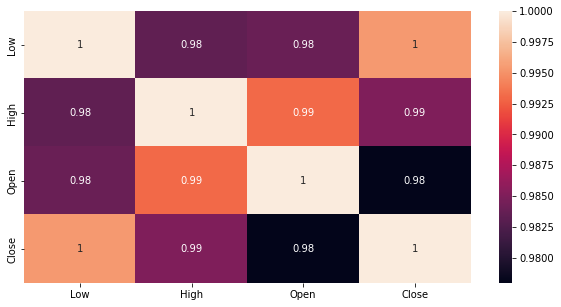

In [68]:
#heatmap for correlation
plt.figure(figsize=(10,5))
sns.heatmap(df[['Low','High','Open','Close']].corr(), annot = True)
plt.show()

In [69]:
#Now, we'll drop Open feature from the VIF matrix
calc_vif(df[[i for i in df.describe().columns if i not in ['Date','Close','Average','Open']]])

,Variables,VIF
0,High,62.598129
1,Low,62.598129


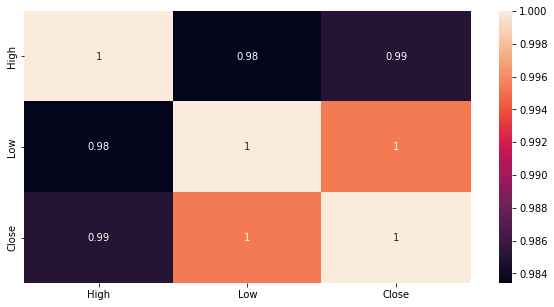

In [71]:
#heatmap for correlation
plt.figure(figsize=(10,5))
sns.heatmap(df[['High','Low','Close']].corr(), annot = True)
plt.show()

Our final dropping variable will be High feature because it has less correlation with dependent variable in comparison.

We've dropped 3 features from our dataset it can effect our model efficiency but neglecting high VIF is far more dangerous than dropping features.

So, we preferred to drop the features and move forward with the Low Variable.

In [1]:
#Installing scipy 
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
#applying zscore to each values of independent variable 
from scipy.stats import zscore
X = round(ind_var.apply(zscore),3)

In [18]:
X

,Open,High,Low
0,-0.938,-0.963,-0.920
1,-0.943,-0.955,-0.906
2,-0.934,-0.955,-0.909
3,-0.936,-0.958,-0.907
4,-0.935,-0.964,-0.902
...,...,...,...
180,-0.811,-0.828,-0.922
181,-0.949,-0.933,-0.913
182,-0.925,-0.950,-0.904
183,-0.935,-0.963,-0.911


In [19]:
#applying log on dependent variable 
y = np.log10(df['Close'])

In [21]:
#Importing libraries
from numpy import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [22]:
#Split our data into train and test datasets 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (148, 3)
X_test:  (37, 3)
y_train:  (148,)
y_test:  (37,)


In [76]:
#Creating DataFrames of test and train dataset
train_df = pd.DataFrame(X_train,y_train)
test_df = pd.DataFrame(y_test)
test_df.rename(columns = {'Close':'Actual Closing Price'},inplace = True)

In [23]:
#Applying Linear Regression 
lr = LinearRegression()
lin_reg = lr.fit(X_train,y_train)

In [24]:
#Checking efficiency of training model
lin_reg.score(X_train,y_train)

0.8091152094340809

In [25]:
#getting regression coefficients 
print('Intercept:',lin_reg.intercept_)
print('Regressors: \n',lin_reg.coef_)

Intercept: 1.8262495893435555
Regressors: 
 [-0.13270791  0.29061643  0.23265022]


In [74]:
#Predict y_test on the basis of train sets
y_pred = lin_reg.predict(X_test)
print("Printed values of Y: \n",y_pred)

Printed values of Y: 
 [1.53276423 1.96672923 1.61039984 1.95577646 1.66713574 1.53291803
 2.3198133  1.47234925 1.46174706 2.27202742 2.59746859 1.77196223
 2.0045669  1.63999469 2.73573264 2.44754382 1.69457789 1.51594662
 2.45298264 1.61176382 1.44547559 1.87456785 2.0156832  1.63781436
 2.25493358 1.63516541 2.42563442 1.46032674 1.83171021 1.62287589
 2.8811247  2.77612524 1.69605907 2.0717636  1.56161009 1.59665024
 2.42253306]


In [77]:
test_df['Predicted Closing Price'] = y_pred
test_df.head(3)

,Actual Closing Price,Predicted Closing Price
33,1.532245,1.532764
125,2.162056,1.966729
173,1.671636,1.610400


In [43]:
def evaluation_metrics(data):
  MSE = mean_squared_error(y_test,data)
  print("Mean Squared Error: ",MSE)
  RMSE = np.sqrt(MSE)
  print("Root Mean Squared Error: ",RMSE)
  r2 = r2_score(y_test,data)
  print("R2: ",r2)
  adjusted_r2 = 1-(1-r2_score(y_test,data))*(X_test.shape[0]-1)/((X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2: ",adjusted_r2)
  return

In [44]:
evaluation_metrics(y_pred)

Mean Squared Error:  0.031980526670162296
Root Mean Squared Error:  0.17883100030521076
R2:  0.8283222778327901
Adjusted R2:  0.8127152121812256


In [45]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_percentage_error
MAE  = mean_absolute_percentage_error

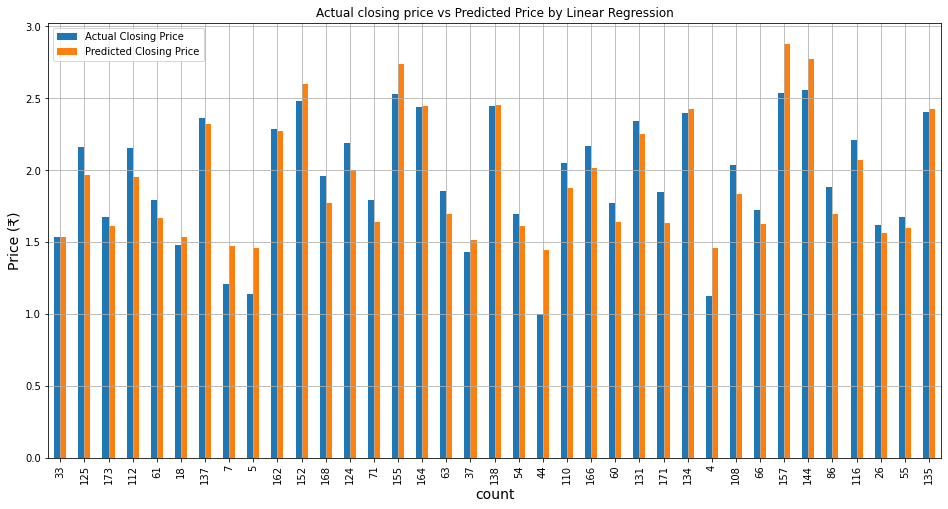

(37, 2)

In [78]:
#Graph between Actual Close price and Predicted Price
test_df.tail(40).plot(kind='bar',figsize=(16,8))   
plt.grid(True)
plt.xlabel('count',fontsize = 14)
plt.ylabel('Price (₹)',fontsize = 14)
plt.title('Actual closing price vs Predicted Price by Linear Regression')
plt.show()
test_df.shape

## RIDGE REGRESSION

In [47]:
ridge  = Lasso(alpha=0.1 , max_iter= 5000)
ridge.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=5000)

In [48]:
ridge.score(X_train,y_train)

0.7469255963300814

In [49]:
y_pred_r = ridge.predict(X_test)

In [50]:
#Getting evaluation metrics for Lasso
evaluation_metrics(y_pred_r)

Mean Squared Error:  0.04206593047137301
Root Mean Squared Error:  0.2050998061222219
R2:  0.774181857645658
Adjusted R2:  0.753652935613445


## Applying cross validation and Hyperparameter Tuning in Ridge

In [64]:
# Applying ridge regression to penalize our parameters
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,2,3,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 2, 3, 5, 10, 20, 30, 40, 45, 50, 55,
                                   60, 100]},
             scoring='neg_mean_squared_error')

In [65]:
print("Best Alpha :" ,ridge_regressor.best_params_)
print("\n By Using ",ridge_regressor.best_params_, " Negative mean squared error is: ", ridge_regressor.best_score_)

Best Alpha : {'alpha': 2}

 By Using  {'alpha': 2}  Negative mean squared error is:  -0.035188435005364935


In [66]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [67]:
#Evaluation metrics for Ridge
evaluation_metrics(y_pred_ridge)

Mean Squared Error:  0.031687434139447995
Root Mean Squared Error:  0.17800964619774962
R2:  0.8298956558629963
Adjusted R2:  0.8144316245778142


In [69]:
test_df['Ridge Predicted Closing Price'] = y_pred_ridge
ridge_df = test_df.loc[:,['Actual Closing Price','Ridge Predicted Closing Price']]
ridge_df.head(5)

,Actual Closing Price,Ridge Predicted Closing Price
33,1.532245,1.538586
125,2.162056,1.982096
173,1.671636,1.629239
112,2.152533,1.957998
61,1.793930,1.662155


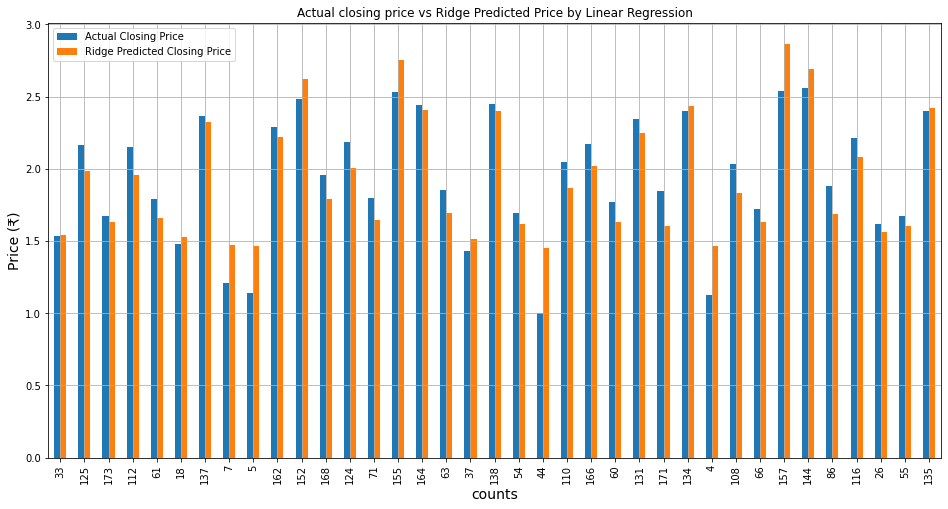

(37, 2)

In [79]:
#Graph between Actual Close price and Ridge Predicted Price
ridge_df.tail(40).plot(kind='bar',figsize=(16,8))   
plt.grid(True)
plt.xlabel('counts',fontsize = 14)
plt.ylabel('Price (₹)',fontsize = 14)
plt.title('Actual closing price vs Ridge Predicted Price by Linear Regression')
plt.show()
test_df.shape

## LASSO REGRESSION

In [80]:
lasso  = Lasso(alpha=0.0001 , max_iter= 6000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=6000)

In [81]:
lasso.score(X_train, y_train)

0.8090939585511401

In [83]:
y_pred_L = lasso.predict(X_test)
y_pred_L

array([1.53332766, 1.96860702, 1.61220737, 1.95629196, 1.66658655,
       1.53256994, 2.32100601, 1.47267468, 1.46215897, 2.26594322,
       2.60050438, 1.77390741, 2.00535034, 1.64057348, 2.73888133,
       2.44292631, 1.69483186, 1.51597748, 2.44751778, 1.61220691,
       1.44585203, 1.87423512, 2.01606982, 1.63754408, 2.25450764,
       1.63125174, 2.42685633, 1.46078243, 1.83225773, 1.62409759,
       2.88012378, 2.76706249, 1.69530866, 2.07291586, 1.56172443,
       1.59719282, 2.42314342])

In [85]:
#Evaluation metrics for Lasso
evaluation_metrics(y_pred_L)

Mean Squared Error:  0.031912411408134535
Root Mean Squared Error:  0.17864045288829328
R2:  0.8286879338818715
Adjusted R2:  0.8131141096893143


In [86]:
# Cross Validation 
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 0.0014]},
             scoring='neg_mean_squared_error')

In [87]:
print("Best fit alpha value:" ,lasso_regressor.best_params_)
print("\nBy Using ",lasso_regressor.best_params_, " Negative mean squared error is: ", lasso_regressor.best_score_)

Best fit alpha value: {'alpha': 0.0014}

By Using  {'alpha': 0.0014}  Negative mean squared error is:  -0.03537004510229651


In [89]:
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_lasso

array([1.5373154 , 1.9799559 , 1.6238585 , 1.95915655, 1.66339659,
       1.5308874 , 2.327414  , 1.47528166, 1.46532461, 2.22728572,
       2.61787385, 1.78609054, 2.00979325, 1.6444484 , 2.75661525,
       2.4130339 , 1.69657551, 1.51667566, 2.41236345, 1.61530286,
       1.44883512, 1.87201421, 2.01813234, 1.63614017, 2.25095967,
       1.60733224, 2.4333491 , 1.46422163, 1.83557679, 1.63202492,
       2.87191231, 2.70897067, 1.69082152, 2.0795591 , 1.56285891,
       1.60092261, 2.42570063])

In [90]:
#Getting evaluation metrics for Lasso
evaluation_metrics(y_pred_lasso)

Mean Squared Error:  0.03173683133331823
Root Mean Squared Error:  0.17814834080989422
R2:  0.829630482064811
Adjusted R2:  0.814142344070703


In [91]:
test_df['Lasso Predicted Closing Price'] = y_pred_lasso
lasso_df = test_df.loc[:,['Actual Closing Price','Lasso Predicted Closing Price']]
lasso_df.head(3)

,Actual Closing Price,Lasso Predicted Closing Price
33,1.532245,1.537315
125,2.162056,1.979956
173,1.671636,1.623859


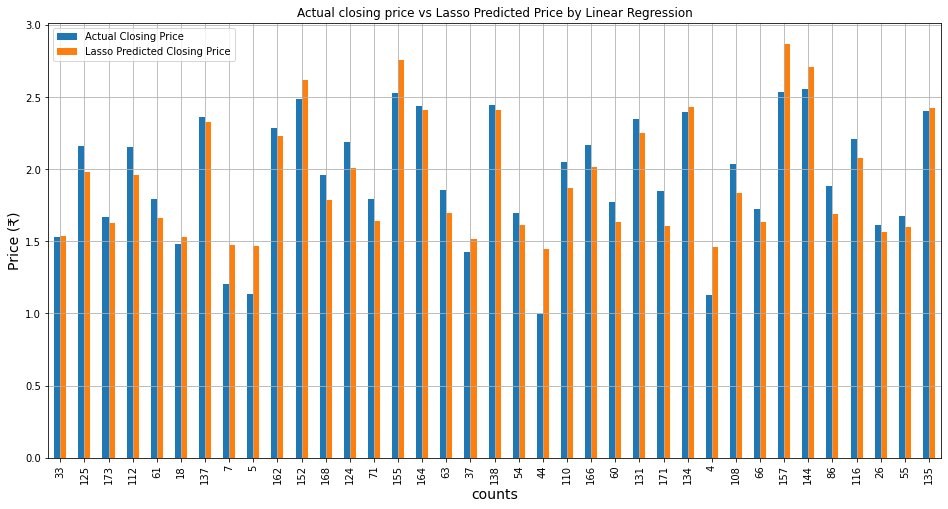

(37, 3)

In [92]:
#Graph between Actual Close price and Lasso Predicted Price
lasso_df.tail(40).plot(kind='bar',figsize=(16,8))   
plt.grid(True)
plt.xlabel('counts',fontsize = 14)
plt.ylabel('Price (₹)',fontsize = 14)
plt.title('Actual closing price vs Lasso Predicted Price by Linear Regression')
plt.show()
test_df.shape